In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_hp = pd.read_csv('train_HP.csv')
data_hp.shape

(1460, 81)

In [7]:
data_hp['Alley'].isnull().sum()
data_hp['Alley'].isnull().mean()

0.9376712328767123

In [9]:
cols_na = [col for col in data_hp.columns if (data_hp[col].isnull().mean() > 0)]
cols_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [15]:
cols_rescatables= [col for col in data_hp.columns if (data_hp[col].isnull().mean() <= 0.06) ]

In [16]:
data_hp_noNAN = data_hp[cols_rescatables].dropna()
data_hp.shape, data_hp_noNAN.shape

((1460, 81), (1338, 75))

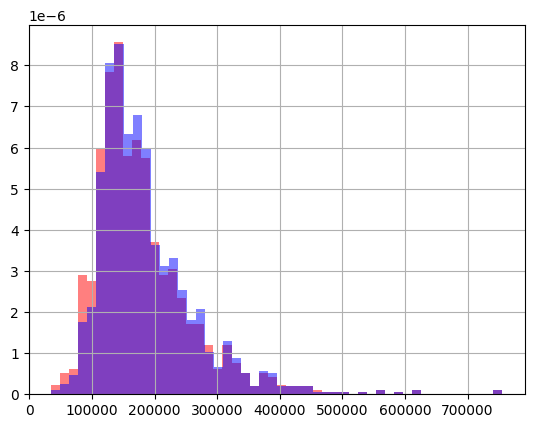

In [17]:
data_hp["SalePrice"].hist(bins=50, density=True, color="red", alpha=0.5)
data_hp_noNAN["SalePrice"].hist(bins=50, density=True, color="blue", alpha=0.5)
plt.show()  

In [18]:
data_titanic = pd.read_csv('titanic.csv')
data_titanic = data_titanic[["Survived", "Age", "Fare"]]
data_titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
data_titanic.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
mean = data_titanic["Age"].mean()
meadian = data_titanic["Age"].median()

print(f"Mean: {mean}")
print(f"Median: {meadian}")

Mean: 29.69911764705882
Median: 28.0


In [29]:
data_titanic["age_mean"] = np.round(data_titanic["Age"].fillna(mean))
data_titanic["age_median"] = np.round(data_titanic["Age"].fillna(meadian))
data_titanic.head()

,Survived,Age,Fare,age_mean,age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


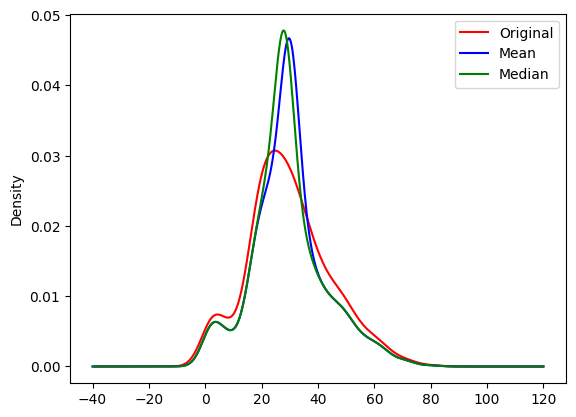

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

data_titanic["Age"].plot.density(label="Original", color="red")
data_titanic["age_mean"].plot.density(label="Mean", color="blue")
data_titanic["age_median"].plot.density(label="Median", color="green")
ax.legend()
plt.show()

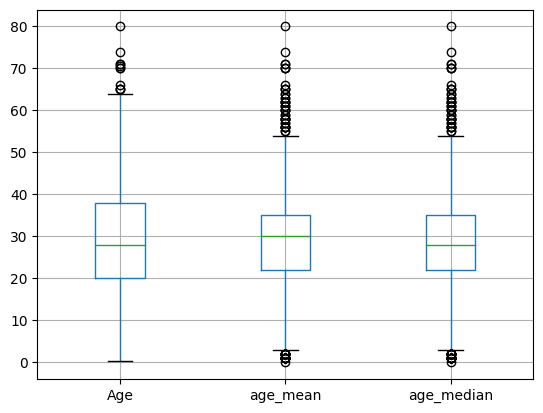

In [34]:
data_titanic[["Age", "age_mean", "age_median"]].boxplot()
plt.show()

In [39]:
dataset_cat_missing = data_hp[["BsmtQual", "FireplaceQu", "SalePrice"]]
dataset_cat_missing.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [40]:
dataset_cat_missing.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [41]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

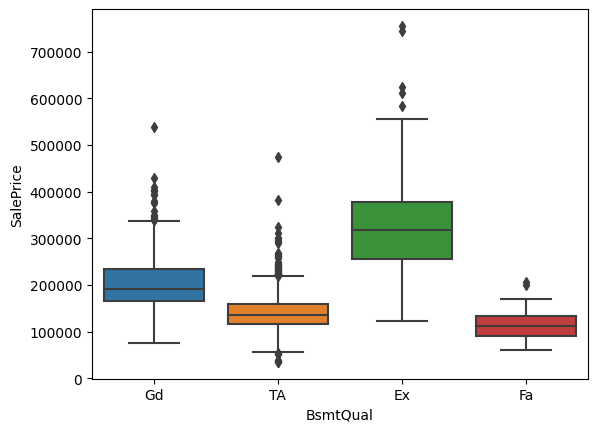

In [49]:
import seaborn as sns

sns.boxplot(x=dataset_cat_missing["BsmtQual"], y=dataset_cat_missing["SalePrice"])

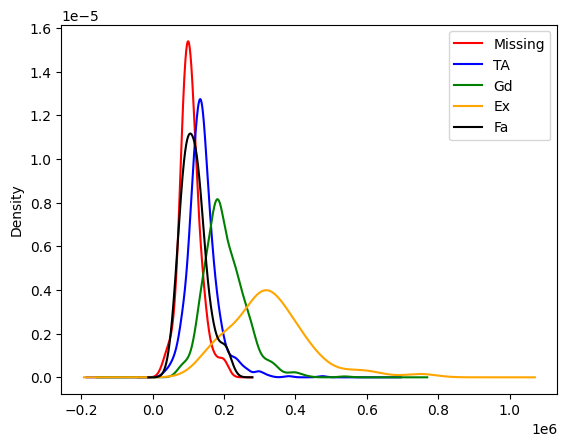

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]["SalePrice"].plot(kind="kde", label="Missing", color="red")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == "TA"]["SalePrice"].plot(kind="kde", label="TA", color="blue")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == "Gd"]["SalePrice"].plot(kind="kde", label="Gd", color="green")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == "Ex"]["SalePrice"].plot(kind="kde", label="Ex", color="orange")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == "Fa"]["SalePrice"].plot(kind="kde", label="Fa", color="black")

ax.legend()

plt.show()

In [59]:
dataset_cat_missing["BsmtQual"].fillna("Fa", inplace=True) # imputamos valores de de FA por ser el más parecido

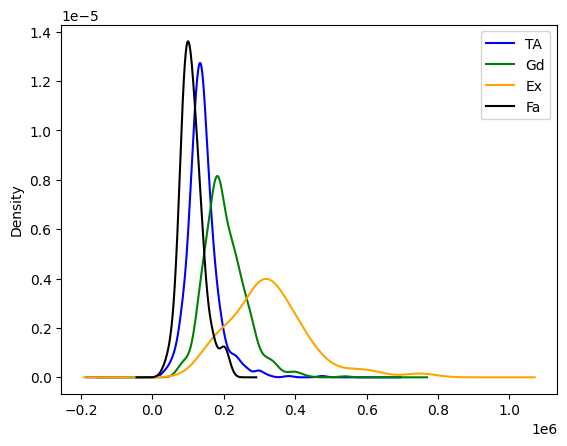

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'] == "TA"]["SalePrice"].plot(kind="kde", label="TA", color="blue")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == "Gd"]["SalePrice"].plot(kind="kde", label="Gd", color="green")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == "Ex"]["SalePrice"].plot(kind="kde", label="Ex", color="orange")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == "Fa"]["SalePrice"].plot(kind="kde", label="Fa", color="black")

ax.legend()

plt.show()